In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
#импортируем scikeras для использования GridSearchCV в модели keras
from scikeras.wrappers import KerasRegressor

In [2]:
#загружаем данные
data = pd.read_csv('G:\\diploma\\data.csv', index_col = 0)
data.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0


In [3]:
X = data.drop('Соотношение матрица-наполнитель', axis=1)
Y = data['Соотношение матрица-наполнитель']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
normalizer = layers.Normalization(input_shape=[12,], axis=None)
normalizer.adapt(np.array(X_train))

Модель Keras

In [5]:
net = keras.Sequential([normalizer, layers.Dense(128, activation='relu'),
                             layers.Dense(128, activation='relu'), 
                             layers.Dense(128, activation='relu'), 
                             layers.Dense(64, activation='relu'),
                             layers.Dense(64, activation='relu'),
                             layers.Dense(32, activation='relu'), 
                             layers.Dense(16, activation='relu'), 
                             layers.Dense(1)
                            ])
net.compile(optimizer = keras.optimizers.Adam(0.001), loss = 'mean_squared_error')

In [6]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 12)                3         
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                        

In [7]:
history = net.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 3s 33ms/step - loss: 6.7633 - val_loss: 1.2053
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 1.2904 - val_loss: 1.3993
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 0.9694 - val_loss: 0.9348
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 0.8667 - val_loss: 0.9077
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.8840 - val_loss: 0.8909
Epoch 6/100
17/17 [==============================] - 0s 10ms/step - loss: 0.8534 - val_loss: 0.9023
Epoch 7/100
17/17 [==============================] - 0s 10ms/step - loss: 0.8391 - val_loss: 0.8684
Epoch 8/100
17/17 [==============================] - 0s 10ms/step - loss: 0.8382 - val_loss: 0.8599
Epoch 9/100
17/17 [==============================] - 0s 10ms/step - loss: 0.8211 - val_loss: 0.8431
Epoch 10/100
17/17 [==============================] - 0s 10ms/step - loss: 0.8362 - val_loss: 0.8779


In [8]:
net.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 0.8583


0.8583014011383057

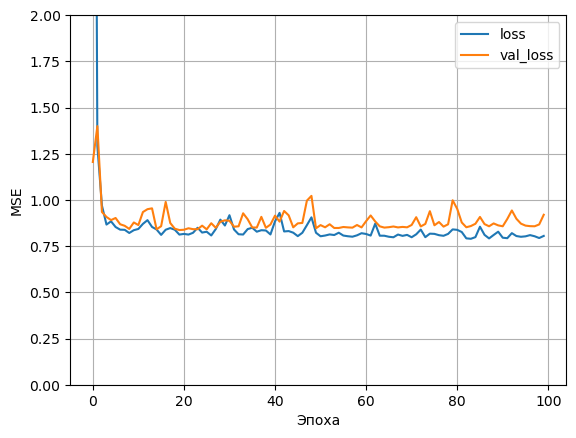

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 2])
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

9/9 [==============================] - 0s 5ms/step


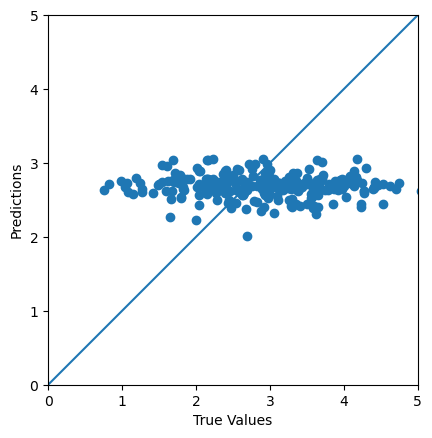

In [10]:
predictions = net.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

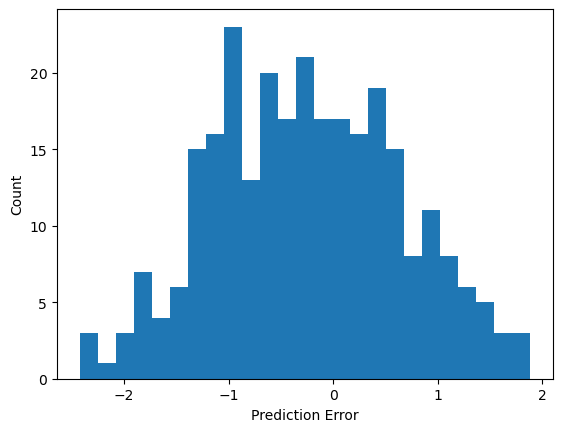

In [11]:
error = predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [12]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [13]:
y_pred_model = net.predict(X_test)
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAE: ', mean_absolute_error(y_test, y_pred_model))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))

9/9 [==============================] - 0s 4ms/step
Model_MAE:  1
Model_MAE:  0.7640305374542619
Model_MAPE: 0.30


Обучим модель линейной регресии для сравнения результатов

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [16]:
net.save('net')

INFO:tensorflow:Assets written to: net\assets


INFO:tensorflow:Assets written to: net\assets
